# Lab Instructions

Create 3 visualizations from text data of your choice.  Each visualization should have at least 1 - 2 sentences explaining both the figure and the interpretation.
You may use any LLM and produce whatever visuals you think best illustrate your data.  

In [1]:
import pandas as pd

df = pd.read_csv("European Restaurant Reviews.csv")

print("Shape:", df.shape)
print("\nColumns:", list(df.columns))

df.head()

Shape: (1502, 6)

Columns: ['Country', 'Restaurant Name', 'Sentiment', 'Review Title', 'Review Date', 'Review']


,Country,Restaurant Name,Sentiment,Review Title,Review Date,Review
0,France,The Frog at Bercy Village,Negative,Rude manager,May 2024 •,The manager became agressive when I said the c...
1,France,The Frog at Bercy Village,Negative,A big disappointment,Feb 2024 •,"I ordered a beef fillet ask to be done medium,..."
2,France,The Frog at Bercy Village,Negative,Pretty Place with Bland Food,Nov 2023 •,"This is an attractive venue with welcoming, al..."
3,France,The Frog at Bercy Village,Negative,Great service and wine but inedible food,Mar 2023 •,Sadly I used the high TripAdvisor rating too ...
4,France,The Frog at Bercy Village,Negative,Avoid- Worst meal in Rome - possibly ever,Nov 2022 •,From the start this meal was bad- especially g...


In [2]:
# Step 2: Clean and tokenize the text (stable implementation)

import re
import nltk
from nltk.corpus import stopwords

# Download stopwords (only needs to run once)
nltk.download('stopwords')

# Create stopword set
stop_words = set(stopwords.words('english'))

def clean_and_tokenize(text):
    """
    Cleans raw review text and returns a list of meaningful tokens.

    Logic:
    1. Convert text to string (prevents errors from NaN values)
    2. Lowercase everything for consistency
    3. Remove punctuation and numbers using regex
    4. Tokenize using simple whitespace split
    5. Remove stopwords
    6. Remove very short words (<=2 characters)
    """
    
    # Ensure text is string
    text = str(text)
    
    # Convert to lowercase
    text = text.lower()
    
    # Remove non-letter characters
    text = re.sub(r'[^a-z\s]', '', text)
    
    # Simple tokenization (split on whitespace)
    tokens = text.split()
    
    # Remove stopwords and short words
    tokens = [
        word for word in tokens
        if word not in stop_words and len(word) > 2
    ]
    
    return tokens


# Apply cleaning function to Review column
df['tokens'] = df['Review'].apply(clean_and_tokenize)

# Preview results
df[['Review', 'tokens']].head()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\lucax\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,Review,tokens
0,The manager became agressive when I said the c...,"[manager, became, agressive, said, carbonara, ..."
1,"I ordered a beef fillet ask to be done medium,...","[ordered, beef, fillet, ask, done, medium, got..."
2,"This is an attractive venue with welcoming, al...","[attractive, venue, welcoming, albeit, somewha..."
3,Sadly I used the high TripAdvisor rating too ...,"[sadly, used, high, tripadvisor, rating, liter..."
4,From the start this meal was bad- especially g...,"[start, meal, bad, especially, given, price, v..."


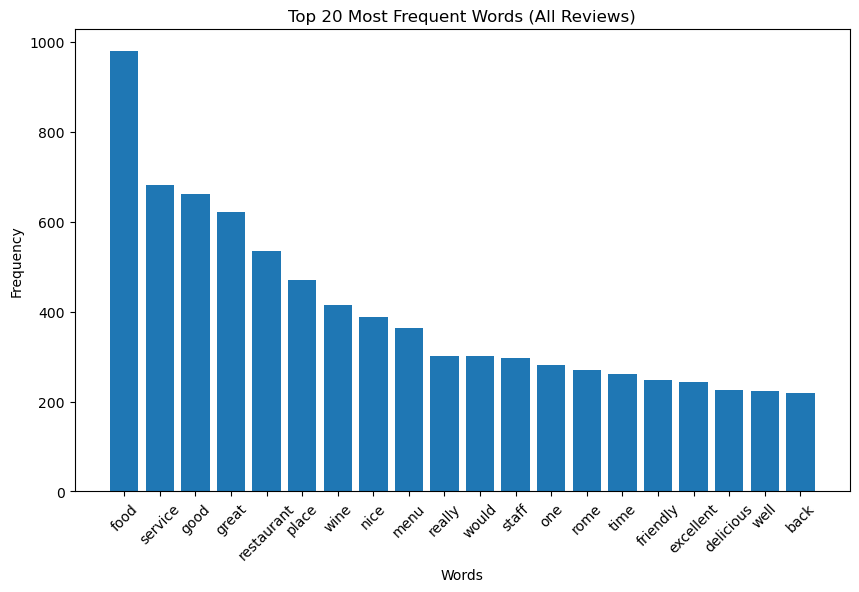

In [3]:
# Step 3: Top 20 Most Frequent Words (Overall)

from collections import Counter
import matplotlib.pyplot as plt

# Combine all tokens into one single list
all_words = []

for tokens in df['tokens']:
    all_words.extend(tokens)

# Count word frequencies
word_counts = Counter(all_words)

# Get top 20 most common words
top_20 = word_counts.most_common(20)

# Separate words and counts for plotting
words = [item[0] for item in top_20]
counts = [item[1] for item in top_20]

# Create bar chart
plt.figure(figsize=(10, 6))
plt.bar(words, counts)

plt.title("Top 20 Most Frequent Words (All Reviews)")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.xticks(rotation=45)

plt.show()

This bar chart shows the twenty most frequent words across all restaurant reviews. Words such as "food," "service," "good," and "great" appear most often indicating that customers primarily focus on food quality and service experience when describing their visits.

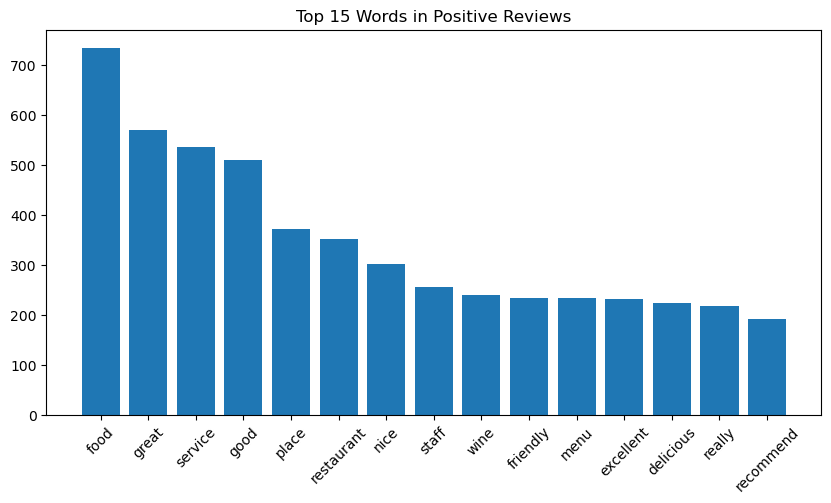

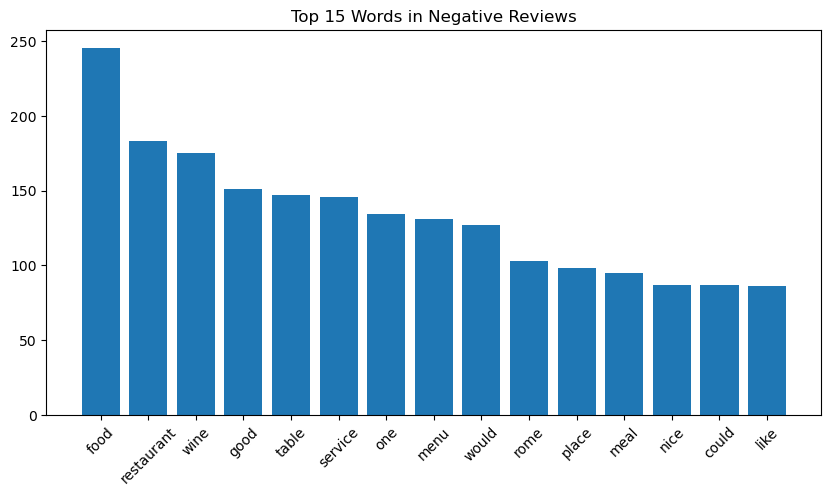

In [4]:
# Step 4: Compare Positive vs Negative Word Frequencies

from collections import Counter

# Separate tokens by sentiment
positive_tokens = []
negative_tokens = []

for index, row in df.iterrows():
    if row['Sentiment'] == 'Positive':
        positive_tokens.extend(row['tokens'])
    else:
        negative_tokens.extend(row['tokens'])

# Count frequencies
positive_counts = Counter(positive_tokens)
negative_counts = Counter(negative_tokens)

# Get top 15 words for each
top_pos = positive_counts.most_common(15)
top_neg = negative_counts.most_common(15)

# Prepare data for plotting
pos_words = [item[0] for item in top_pos]
pos_counts = [item[1] for item in top_pos]

neg_words = [item[0] for item in top_neg]
neg_counts = [item[1] for item in top_neg]

# Plot Positive
plt.figure(figsize=(10, 5))
plt.bar(pos_words, pos_counts)
plt.title("Top 15 Words in Positive Reviews")
plt.xticks(rotation=45)
plt.show()

# Plot Negative
plt.figure(figsize=(10, 5))
plt.bar(neg_words, neg_counts)
plt.title("Top 15 Words in Negative Reviews")
plt.xticks(rotation=45)
plt.show()

Positive reviews are dominated by words such as "great," "service," "excellent," and "delicious" suggesting satisfaction with food quality and service experience. In contrast, negative reviews emphasize more neutral and contextual words such as "table," "menu," and "would," indicating complaints often relate to specific service situations rather than strong positive descriptors. The contrast shows that positive views use strong language while negative reviews focus more on specific issues.

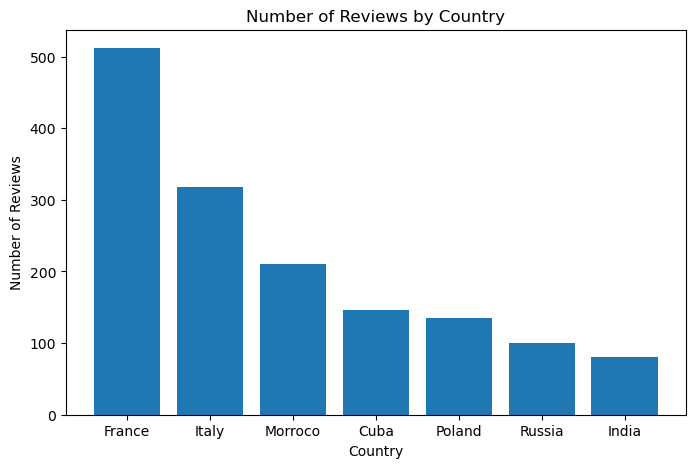

In [5]:
# Step 5: Review Count by Country

import matplotlib.pyplot as plt

# Count number of reviews per country
country_counts = df['Country'].value_counts()

# Plot
plt.figure(figsize=(8, 5))
plt.bar(country_counts.index, country_counts.values)

plt.title("Number of Reviews by Country")
plt.xlabel("Country")
plt.ylabel("Number of Reviews")

plt.show()

France has the highest number of reviews, followed by Italy, indicating that the dataset is heavily concentrated in these two countries. This suggeests the analysis may primarily reflect the customer experience in France and Italy rather than being evenly distributed across all countries.

### Dataset Description:
The dataset contains 1,502 restaurant reviews collected from multiple countries including France, Italy, Morocco, Cuba, Poland, Russia, and India. Each entry includes the country, restaurant name, sentiment label (Positive or Negative), review title, review date, and full review text. The dataset is appropriate for text analysis because it contains rich natural language data along with labeled sentiment categories, allowing for comparative text visualizations.